# Prediction of attendances at Emergency Services in Scottish Hospitals

### In ranges of 4, 8 and 12 hours

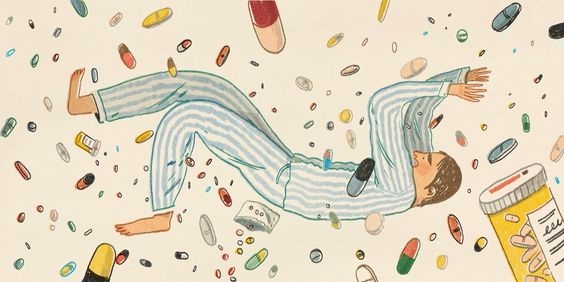

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
#import igraph as ig
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

import tensorflow as tf
import warnings

from tensorflow import keras
from tensorflow.keras import layers

import seaborn as sns
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (25, 5)

In [2]:
#http://localhost:8888/notebooks/Desktop/Ena/Ena%202021/CodeOp/ds-cat-intro-to-deep-learning-Enaguerra/Labs/eng/07.Walk_Through_Exercise_House_Prediction.ipynb

In [3]:
df = pd.read_csv("datos-emergencia-escocia2.csv",parse_dates=[0])
#para que me lea la columna 0 como datetime
df.head()

Week_Ending_Date  Week number  month  year  Season  Sum attendance emergency  Diferencia atttendance  Attendance de la semana anterior en emergencias  Attendance de la semana anterior  Semana con fecha de fin de mes  Semana con holidays NHS_Board_Code NHS_Board_Name Location_Code             Location_Name  Attendance  Number_Over_4_Hours  Percentage_Within_4_Hours  Number_Over_8_Hours  Percentage_Within_8_Hours  Number_Over_12_Hours  Percentage_Within_12_Hours       Data_Source  Fundacion  Beds  Number location           Location_Name.1
0       2015-02-22            9      2  2015       0                       203                     914                                              112                              1025                               0                    0              N   NHS Grampian         N101H  Aberdeen Royal Infirmary        1117                  164                         85                   36                         97                     3                         100  ISD A&E Datamart       1737   922                8  Aberdeen Royal Infirmary
1       2015-01-03           10      3  2015       0                       163                     948                                              203                               914                               1                    0              N   NHS Grampian         N101H  Aberdeen Royal Infirmary        1111                  149                         87                   14                         99                     0                         100  ISD A&E Datamart       1737   922                8  Aberdeen Royal Infirmary
2       2015-08-03           11      3  2015       0                       120                     963                                              163                               948                               0                    1              N   NHS Grampian         N101H  Aberdeen Royal Infirmary        1083                  111                         90                    9                         99                     0                         100  ISD A&E Datamart       1737   922                8  Aberdeen Royal Infirmary
3       2015-03-15           12      3  2015       0                       126                     924                                              120                               963                               0                    0              N   NHS Grampian         N101H  Aberdeen Royal Infirmary        1050                  107                         90                   17                         98                     2                         100  ISD A&E Datamart       1737   922                8  Aberdeen Royal Infirmary
4       2015-03-22           13      3  2015       0                       141                     944                                              126                               924                               0                    0              N   NHS Grampian         N101H  Aberdeen Royal Infirmary        1085                  131                         88                   10                         99                     0                         100  ISD A&E Datamart       1737   922                8  Aberdeen Royal Infirmary

In [4]:
df.nunique()

Week_Ending_Date                                    359
Week number                                          53
month                                                12
year                                                  8
Season                                                4
Sum attendance emergency                            684
Diferencia atttendance                             1828
Attendance de la semana anterior en emergencias     681
Attendance de la semana anterior                   1828
Semana con fecha de fin de mes                        2
Semana con holidays                                   2
NHS_Board_Code                                       15
NHS_Board_Name                                       15
Location_Code                                        33
Location_Name                                        34
Attendance                                         2010
Number_Over_4_Hours                                 615
Percentage_Within_4_Hours                       

In [5]:
df.isna().sum()

Week_Ending_Date                                   0
Week number                                        0
month                                              0
year                                               0
Season                                             0
Sum attendance emergency                           0
Diferencia atttendance                             0
Attendance de la semana anterior en emergencias    0
Attendance de la semana anterior                   0
Semana con fecha de fin de mes                     0
Semana con holidays                                0
NHS_Board_Code                                     0
NHS_Board_Name                                     0
Location_Code                                      0
Location_Name                                      0
Attendance                                         0
Number_Over_4_Hours                                0
Percentage_Within_4_Hours                          0
Number_Over_8_Hours                           

In [6]:
df['Week_Ending_Date'].unique()

array(['2015-02-22T00:00:00.000000000', '2015-01-03T00:00:00.000000000',
       '2015-08-03T00:00:00.000000000', '2015-03-15T00:00:00.000000000',
       '2015-03-22T00:00:00.000000000', '2015-03-29T00:00:00.000000000',
       '2015-05-04T00:00:00.000000000', '2015-12-04T00:00:00.000000000',
       '2015-04-19T00:00:00.000000000', '2015-04-26T00:00:00.000000000',
       '2015-03-05T00:00:00.000000000', '2015-10-05T00:00:00.000000000',
       '2015-05-17T00:00:00.000000000', '2015-05-24T00:00:00.000000000',
       '2015-05-31T00:00:00.000000000', '2015-07-06T00:00:00.000000000',
       '2015-06-14T00:00:00.000000000', '2015-06-21T00:00:00.000000000',
       '2015-06-28T00:00:00.000000000', '2015-05-07T00:00:00.000000000',
       '2015-12-07T00:00:00.000000000', '2015-07-19T00:00:00.000000000',
       '2015-07-26T00:00:00.000000000', '2015-02-08T00:00:00.000000000',
       '2015-09-08T00:00:00.000000000', '2015-08-16T00:00:00.000000000',
       '2015-08-23T00:00:00.000000000', '2015-08-30

In [7]:
df['Week number'].unique()

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
       43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,  2,  3,  4,  5,  6,  7,
        8,  1], dtype=int64)

In [8]:
df.dtypes

Week_Ending_Date                                   datetime64[ns]
Week number                                                 int64
month                                                       int64
year                                                        int64
Season                                                      int64
Sum attendance emergency                                    int64
Diferencia atttendance                                      int64
Attendance de la semana anterior en emergencias             int64
Attendance de la semana anterior                            int64
Semana con fecha de fin de mes                              int64
Semana con holidays                                         int64
NHS_Board_Code                                             object
NHS_Board_Name                                             object
Location_Code                                              object
Location_Name                                              object
Attendance

In [9]:
df["f_data"] = pd.to_datetime(df["Week_Ending_Date"])
df


Week_Ending_Date  Week number  month  year  Season  Sum attendance emergency  Diferencia atttendance  Attendance de la semana anterior en emergencias  Attendance de la semana anterior  Semana con fecha de fin de mes  Semana con holidays NHS_Board_Code   NHS_Board_Name Location_Code             Location_Name  Attendance  Number_Over_4_Hours  Percentage_Within_4_Hours  Number_Over_8_Hours  Percentage_Within_8_Hours  Number_Over_12_Hours  Percentage_Within_12_Hours            Data_Source  Fundacion  Beds  Number location           Location_Name.1     f_data
0          2015-02-22            9      2  2015       0                       203                     914                                              112                              1025                               0                    0              N     NHS Grampian         N101H  Aberdeen Royal Infirmary        1117                  164                         85                   36                         97                     3                         100       ISD A&E Datamart       1737   922                8  Aberdeen Royal Infirmary 2015-02-22
1          2015-01-03           10      3  2015       0                       163                     948                                              203                               914                               1                    0              N     NHS Grampian         N101H  Aberdeen Royal Infirmary        1111                  149                         87                   14                         99                     0                         100       ISD A&E Datamart       1737   922                8  Aberdeen Royal Infirmary 2015-01-03
2          2015-08-03           11      3  2015       0                       120                     963                                              163                               948                               0                    1              N     NHS Grampian         N101H  Aberdeen Royal Infirmary        1083                  111                         90                    9                         99                     0                         100       ISD A&E Datamart       1737   922                8  Aberdeen Royal Infirmary 2015-08-03
3          2015-03-15           12      3  2015       0                       126                     924                                              120                               963                               0                    0              N     NHS Grampian         N101H  Aberdeen Royal Infirmary        1050                  107                         90                   17                         98                     2                         100       ISD A&E Datamart       1737   922                8  Aberdeen Royal Infirmary 2015-03-15
4          2015-03-22           13      3  2015       0                       141                     944                                              126                               924                               0                    0              N     NHS Grampian         N101H  Aberdeen Royal Infirmary        1085                  131                         88                   10                         99                     0                         100       ISD A&E Datamart       1737   922                8  Aberdeen Royal Infirmary 2015-03-22
...               ...          ...    ...   ...     ...                       ...                     ...                                              ...                               ...                             ...                  ...            ...              ...           ...                       ...         ...                  ...                        ...                  ...                        ...                   ...                         ...                    ...        ...   ...              ...                       ...        ...
7778       2019-08-12           50     12  

In [10]:
df.dtypes

Week_Ending_Date                                   datetime64[ns]
Week number                                                 int64
month                                                       int64
year                                                        int64
Season                                                      int64
Sum attendance emergency                                    int64
Diferencia atttendance                                      int64
Attendance de la semana anterior en emergencias             int64
Attendance de la semana anterior                            int64
Semana con fecha de fin de mes                              int64
Semana con holidays                                         int64
NHS_Board_Code                                             object
NHS_Board_Name                                             object
Location_Code                                              object
Location_Name                                              object
Attendance

### Tengo que cambiar el tipo de datos?

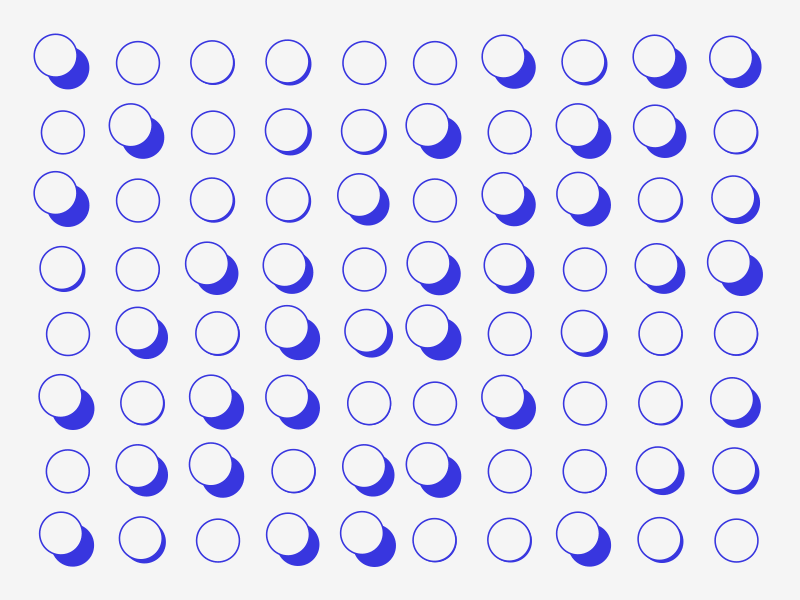

Tengo que cambiar los objects a int?

Tengo que hacer drops de columnas y luego hacer una lista de graficos

In [11]:
df['Location_Name'].count()

7783

In [12]:
df['Location_Name'].unique()

array(['Aberdeen Royal Infirmary', 'Balfour Hospital', 'Belford Hospital',
       'Borders General Hospital', 'Caithness General Hospital',
       "Dr Gray's Hospital", 'Dumfries & Galloway Royal Infirmary',
       'Forth Valley Royal Hospital', 'Galloway Community Hospital',
       'Gilbert Bain Hospital', 'Glasgow Royal Infirmary',
       'Hairmyres Hospital', 'Inverclyde Royal Hospital',
       'Lorn & Islands Hospital', 'Monklands District General Hospital',
       'NHSScotland', 'Ninewells Hospital', 'Perth Royal Infirmary',
       'Queen Elizabeth University Hospital', 'Raigmore Hospital',
       "Royal Aberdeen Children's Hospital", 'Royal Alexandra Hospital',
       'Royal Hospital For Children',
       'Royal Hospital For Sick Children (Edinburgh)',
       'Royal Infirmary Of Edinburgh At Little France',
       'Southern General Hospital', "St John's Hospital",
       'University Hospital Ayr', 'University Hospital Crosshouse',
       'Victoria Hospital', 'Victoria Infirmary',

In [13]:
df['Location_Name'].value_counts()

University Hospital Crosshouse                   255
Royal Hospital For Children                      255
Forth Valley Royal Hospital                      255
Inverclyde Royal Hospital                        255
Caithness General Hospital                       255
Royal Hospital For Sick Children (Edinburgh)     255
Borders General Hospital                         255
Hairmyres Hospital                               255
Western Isles Hospital                           255
Royal Infirmary Of Edinburgh At Little France    255
St John's Hospital                               255
Balfour Hospital                                 255
Lorn & Islands Hospital                          255
University Hospital Ayr                          255
Royal Alexandra Hospital                         255
Belford Hospital                                 255
Gilbert Bain Hospital                            255
Glasgow Royal Infirmary                          255
Monklands District General Hospital           

In [14]:
fig = px.pie(df['Location_Name'].value_counts().reset_index(), values='Location_Name', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [15]:
df_counts = df['Location_Name'].value_counts()
df_counts[:29]

University Hospital Crosshouse                   255
Royal Hospital For Children                      255
Forth Valley Royal Hospital                      255
Inverclyde Royal Hospital                        255
Caithness General Hospital                       255
Royal Hospital For Sick Children (Edinburgh)     255
Borders General Hospital                         255
Hairmyres Hospital                               255
Western Isles Hospital                           255
Royal Infirmary Of Edinburgh At Little France    255
St John's Hospital                               255
Balfour Hospital                                 255
Lorn & Islands Hospital                          255
University Hospital Ayr                          255
Royal Alexandra Hospital                         255
Belford Hospital                                 255
Gilbert Bain Hospital                            255
Glasgow Royal Infirmary                          255
Monklands District General Hospital           

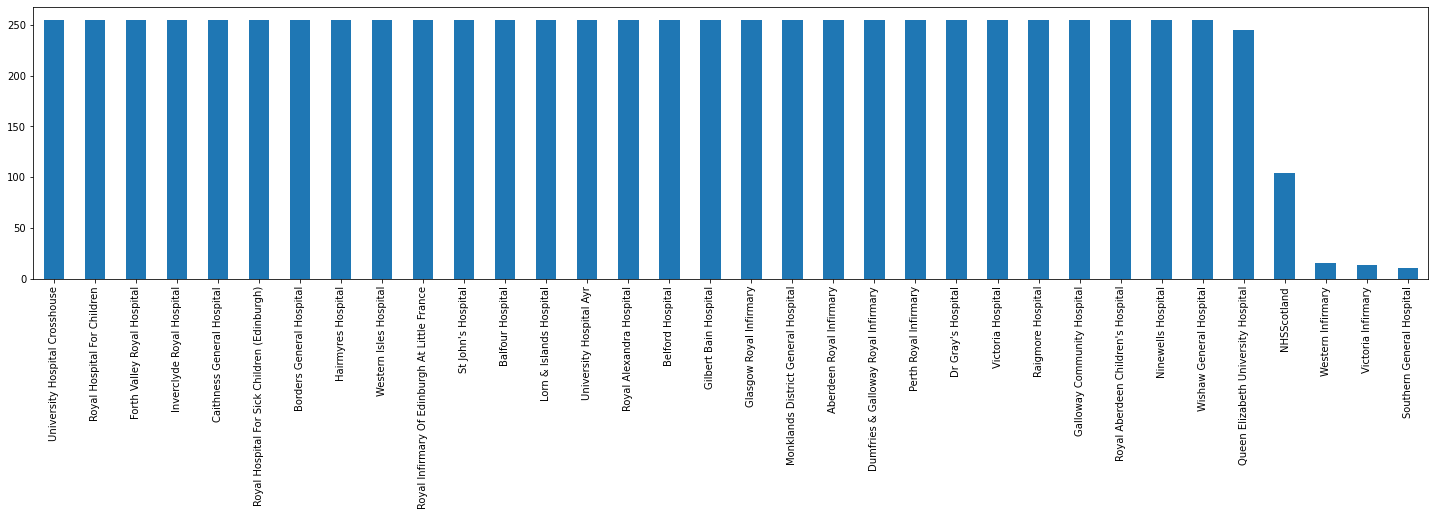

In [16]:
df_counts[:34].plot(kind='bar');

In [17]:
dfsize=df.groupby(["year","Location_Name"]).size().to_frame("size").reset_index()
#esta gurdando como indice los años y location name
dfsize

year               Location_Name  size
0    2015    Aberdeen Royal Infirmary    45
1    2015            Balfour Hospital    45
2    2015            Belford Hospital    45
3    2015    Borders General Hospital    45
4    2015  Caithness General Hospital    45
..    ...                         ...   ...
181  2020           Victoria Hospital     1
182  2020      Western Isles Hospital     1
183  2020     Wishaw General Hospital     1
184  2021                 NHSScotland    51
185  2022                 NHSScotland     2

[186 rows x 3 columns]

In [18]:
dfsize["year"]=dfsize["year"].astype("category")

In [19]:
fig = px.bar(dfsize, y='Location_Name',color="year",x="size",height=1000)
fig.show()

In [20]:
fig = px.histogram(df, x='year',color="Location_Name")
fig.show()

year y Sum attendance emergency

In [21]:
dfsize1=df.groupby(["month","Location_Name"]).size().to_frame("size").reset_index()
#esta gurdando como indice los años y location name
dfsize1

month                   Location_Name  size
0        1        Aberdeen Royal Infirmary    19
1        1                Balfour Hospital    19
2        1                Belford Hospital    19
3        1        Borders General Hospital    19
4        1      Caithness General Hospital    19
..     ...                             ...   ...
379     12         University Hospital Ayr    23
380     12  University Hospital Crosshouse    23
381     12               Victoria Hospital    23
382     12          Western Isles Hospital    23
383     12         Wishaw General Hospital    23

[384 rows x 3 columns]

In [22]:
fig = px.bar(dfsize1, y='Location_Name',color="month",x="size",height=1000)
fig.show()

In [23]:
dfsize2=df.groupby(["Season","Location_Name"]).size().to_frame("size").reset_index()
#esta gurdando como indice los años y location name
dfsize2

Season                   Location_Name  size
0         0        Aberdeen Royal Infirmary   124
1         0                Balfour Hospital   124
2         0                Belford Hospital   124
3         0        Borders General Hospital   124
4         0      Caithness General Hospital   124
..      ...                             ...   ...
125       3         University Hospital Ayr    44
126       3  University Hospital Crosshouse    44
127       3               Victoria Hospital    44
128       3          Western Isles Hospital    44
129       3         Wishaw General Hospital    44

[130 rows x 3 columns]

In [24]:
fig = px.histogram(dfsize2, y='Location_Name',color="Season",x="size",height=1000)
fig.show()

### Quiero saber el attendance en porcentaje por estaciones del año

In [36]:
dfsize3=df.groupby(["Season"]).sum()["Sum attendance emergency"].reset_index()
#esta gurdando como indice los años y location name
dfsize3

Season  Sum attendance emergency
0       0                    589715
1       1                    146623
2       2                    164402
3       3                    212380

In [26]:
#how to map column labels

In [35]:
fig = px.pie(dfsize3.reset_index(), values='Sum attendance emergency', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [28]:
dfsize3['Sum attendance emergency'].value_counts().reset_index()
dfsize3.groupby("Season").mean()

Sum attendance emergency
Season                          
0                         589715
1                         146623
2                         164402
3                         212380

### Quiero una tabla con las variables que voy a correlacionar

In [29]:
df.head()

Week_Ending_Date  Week number  month  year  Season  Sum attendance emergency  Diferencia atttendance  Attendance de la semana anterior en emergencias  Attendance de la semana anterior  Semana con fecha de fin de mes  Semana con holidays NHS_Board_Code NHS_Board_Name Location_Code             Location_Name  Attendance  Number_Over_4_Hours  Percentage_Within_4_Hours  Number_Over_8_Hours  Percentage_Within_8_Hours  Number_Over_12_Hours  Percentage_Within_12_Hours       Data_Source  Fundacion  Beds  Number location           Location_Name.1     f_data
0       2015-02-22            9      2  2015       0                       203                     914                                              112                              1025                               0                    0              N   NHS Grampian         N101H  Aberdeen Royal Infirmary        1117                  164                         85                   36                         97                     3                         100  ISD A&E Datamart       1737   922                8  Aberdeen Royal Infirmary 2015-02-22
1       2015-01-03           10      3  2015       0                       163                     948                                              203                               914                               1                    0              N   NHS Grampian         N101H  Aberdeen Royal Infirmary        1111                  149                         87                   14                         99                     0                         100  ISD A&E Datamart       1737   922                8  Aberdeen Royal Infirmary 2015-01-03
2       2015-08-03           11      3  2015       0                       120                     963                                              163                               948                               0                    1              N   NHS Grampian         N101H  Aberdeen Royal Infirmary        1083                  111                         90                    9                         99                     0                         100  ISD A&E Datamart       1737   922                8  Aberdeen Royal Infirmary 2015-08-03
3       2015-03-15           12      3  2015       0                       126                     924                                              120                               963                               0                    0              N   NHS Grampian         N101H  Aberdeen Royal Infirmary        1050                  107                         90                   17                         98                     2                         100  ISD A&E Datamart       1737   922                8  Aberdeen Royal Infirmary 2015-03-15
4       2015-03-22           13      3  2015       0                       141                     944                                              126                               924                               0                    0              N   NHS Grampian         N101H  Aberdeen Royal Infirmary        1085                  131                         88                   10                         99                     0                         100  ISD A&E Datamart       1737   922                8  Aberdeen Royal Infirmary 2015-03-22

In [30]:
df.nunique()

Week_Ending_Date                                    359
Week number                                          53
month                                                12
year                                                  8
Season                                                4
Sum attendance emergency                            684
Diferencia atttendance                             1828
Attendance de la semana anterior en emergencias     681
Attendance de la semana anterior                   1828
Semana con fecha de fin de mes                        2
Semana con holidays                                   2
NHS_Board_Code                                       15
NHS_Board_Name                                       15
Location_Code                                        33
Location_Name                                        34
Attendance                                         2010
Number_Over_4_Hours                                 615
Percentage_Within_4_Hours                       

-----------------

In [31]:
df_correlacion=df.loc[:, ["Week number","Season","Sum attendance emergency","Attendance de la semana anterior en emergencias","Semana con fecha de fin de mes","Semana con holidays","Number location","Number_Over_4_Hours","Number_Over_8_Hours","Number_Over_12_Hours","Fundacion","Beds"]]
df_correlacion

Week number  Season  Sum attendance emergency  Attendance de la semana anterior en emergencias  Semana con fecha de fin de mes  Semana con holidays  Number location  Number_Over_4_Hours  Number_Over_8_Hours  Number_Over_12_Hours  Fundacion  Beds
0               9       0                       203                                              112                               0                    0                8                  164                   36                     3       1737   922
1              10       0                       163                                              203                               1                    0                8                  149                   14                     0       1737   922
2              11       0                       120                                              163                               0                    1                8                  111                    9                     0       1737   922
3              12       0                       126                                              120                               0                    0                8                  107                   17                     2       1737   922
4              13       0                       141                                              126                               0                    0                8                  131                   10                     0       1737   922
...           ...     ...                       ...                                              ...                             ...                  ...              ...                  ...                  ...                   ...        ...   ...
7778           50       0                       317                                              369                               0                    1               24                  274                   36                     7       2001   633
7779           51       0                       445                                              317                               0                    0               24                  380                   53                    12       2001   633
7780           52       0                       540                                              445                               0                    0               24                  443                   80                    17       2001   633
7781           53       0                       219                                              540                               0                    1               24                  187                   26                     6       2001   633
7782            2       0                       329                                              219                               1                    1               24                  276                   46                     7       2001   633

[7783 rows x 12 columns]

In [32]:
df_correlacion.corr()

Week number    Season  Sum attendance emergency  Attendance de la semana anterior en emergencias  Semana con fecha de fin de mes  Semana con holidays  Number location  Number_Over_4_Hours  Number_Over_8_Hours  Number_Over_12_Hours  Fundacion      Beds
Week number                                         1.000000  0.395127                  0.014757                                         0.016611                       -0.047112            -0.069820         0.001823             0.014082             0.016588              0.016932   0.003930 -0.003340
Season                                              0.395127  1.000000                 -0.006109                                        -0.007699                       -0.021579            -0.173803         0.001949            -0.005041            -0.009847             -0.010275   0.003337 -0.001342
Sum attendance emergency                            0.014757 -0.006109                  1.000000                                         0.978120                        0.001714             0.007715         0.155397             0.997690             0.971321              0.931057  -0.012935  0.818308
Attendance de la semana anterior en emergencias     0.016611 -0.007699                  0.978120                                         1.000000                       -0.007433            -0.003351         0.155871             0.978273             0.940831              0.901137  -0.013529  0.819995
Semana con fecha de fin de mes                     -0.047112 -0.021579                  0.001714                                        -0.007433                        1.000000             0.196913         0.000092             0.001889             0.001324             -0.000263  -0.000109 -0.000084
Semana con holidays                                -0.069820 -0.173803                  0.007715                                        -0.003351                        0.196913             1.000000        -0.000490             0.007058             0.010563              0.007669  -0.000983 -0.000462
Number location                                     0.001823  0.001949                  0.155397                                         0.155871                        0.000092            -0.000490         1.000000             0.161030             0.130546              0.112537  -0.075090  0.184680
Number_Over_4_Hours                                 0.014082 -0.005041                  0.997690                                         0.978273                        0.001889             0.007058         0.161030             1.000000             0.953068              0.905148  -0.017205  0.840700
Number_Over_8_Hours                                 0.016588 -0.009847                  0.971321                                         0.940831                        0.001324             0.010563         0.130546             0.953068             1.000000              0.983522   0.002083  0.707728
Number_Over_12_Hours                                0.016932 -0.010275                  0.931057                                         0.901137                       -0.000263             0.007669         0.112537             0.905148             0.983522              1.000000   0.011004  0.646318
Fundacion                                           0.003930  0.003337                 -0.012935                                        -0.013529                       -0.000109            -0.000983        -0.075090            -0.017205             0.002083              0.011004   1.000000 -0.002592
Beds                                               -0.003340 -0.001342                  0.818308                                         0.819995                       -0.000084            -0.000462         0.184680             0.840700             0.707728              0.646318  -0.002592  1.000000

### Correlación

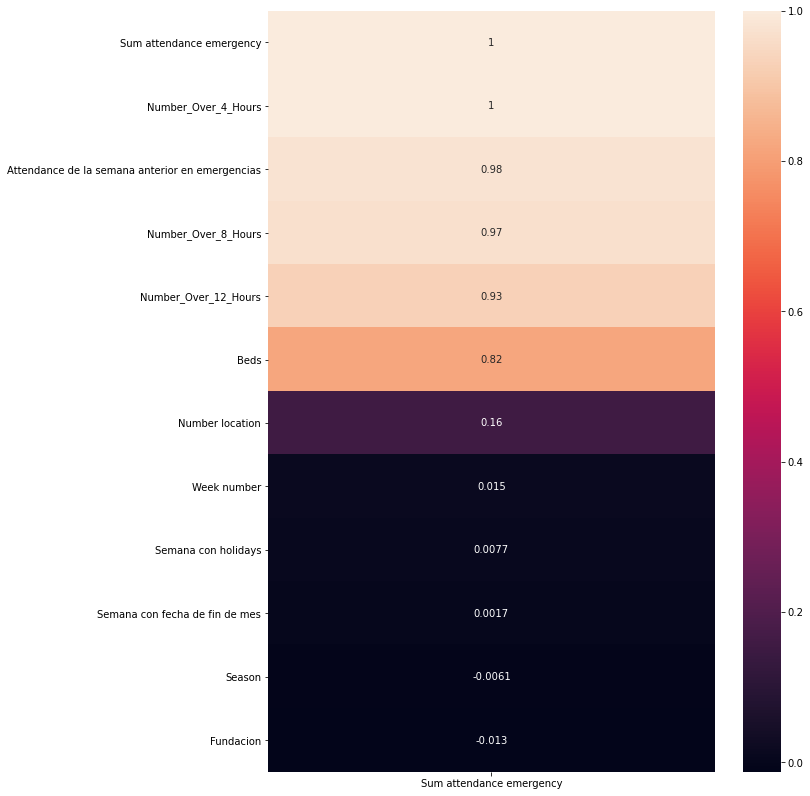

In [33]:
_, ax = plt.subplots(figsize=(10,14))

# If you add more columns next to SalePrice you'll also have correlation for those columns
saleprice_corr = df_correlacion.corr()[
    ['Sum attendance emergency']
].sort_values(by='Sum attendance emergency', ascending=False)

sns.heatmap(saleprice_corr, annot=True, ax=ax)

plt.show()

hacer con dos semanas y 3 semanas anteriores

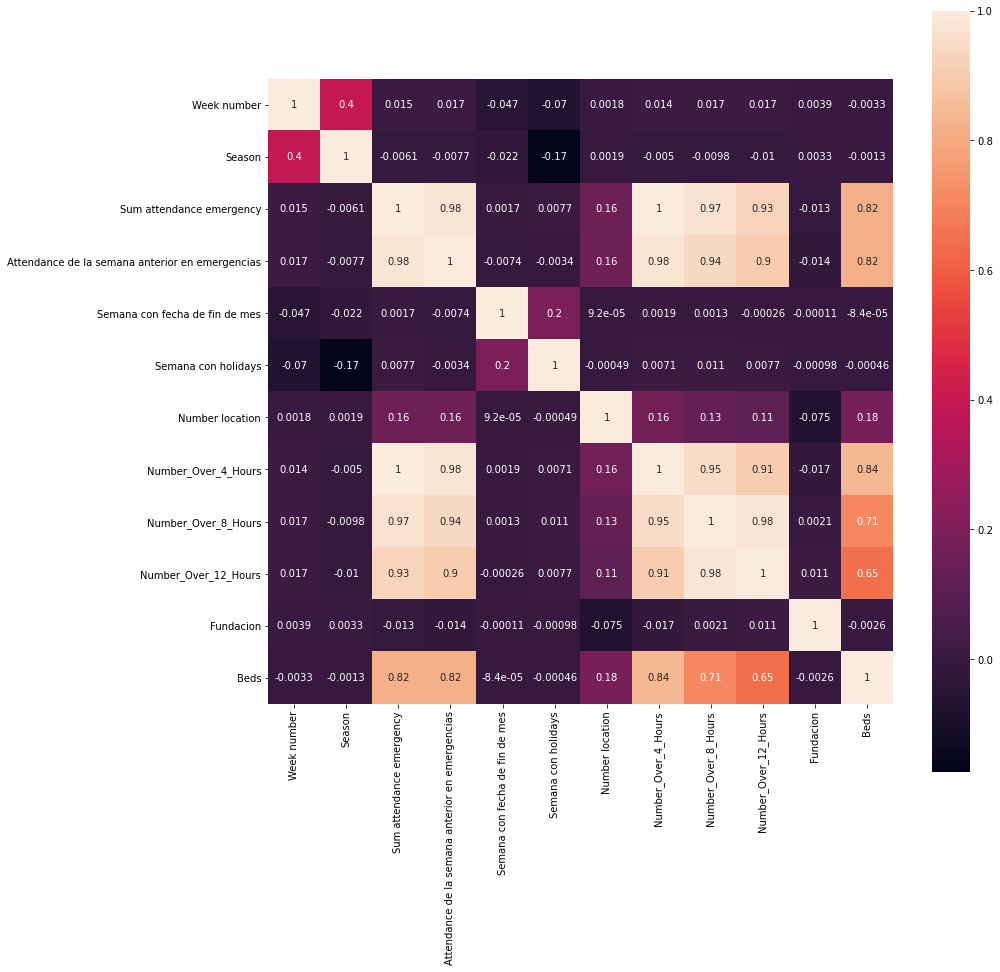

In [35]:
fig,ax = plt.subplots(figsize=(14,14))
sns.heatmap(df_correlacion.corr(),square=True,annot=True,ax=ax);
#Es como un plot que puede tener mas de una division



----------------------------------

----------------------------------

----------------------------------

## <font color='*forestgreen*'> Quiero predecir las 
###    <font color='*forestgreen*'> personas que llegaran por emergencias semanalmente

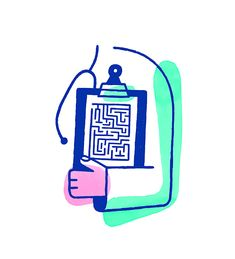

In [36]:
df_correlacion.describe()

Week number       Season  Sum attendance emergency  Attendance de la semana anterior en emergencias  Semana con fecha de fin de mes  Semana con holidays  Number location  Number_Over_4_Hours  Number_Over_8_Hours  Number_Over_12_Hours    Fundacion          Beds
count  7783.000000  7783.000000               7783.000000                                      7783.000000                     7783.000000          7783.000000      7783.000000          7783.000000          7783.000000           7783.000000  7783.000000   7783.000000
mean     27.860594     1.028395                143.019401                                       141.950019                        0.231530             0.145445        17.318515           123.717590            15.587434              3.714377  1929.247077    643.616986
std      14.857525     1.159959                583.186936                                       574.830164                        0.421837             0.352572        10.095289           467.702462            93.023006             28.150356    81.425285   1472.757351
min       1.000000     0.000000                  0.000000                                         0.000000                        0.000000             0.000000         1.000000             0.000000             0.000000              0.000000  1729.000000     34.000000
25%      15.000000     0.000000                  9.000000                                         9.000000                        0.000000             0.000000         8.000000             8.000000             0.000000              0.000000  1863.000000    167.000000
50%      28.000000     1.000000                 41.000000                                        41.000000                        0.000000             0.000000        19.000000            40.000000             1.000000              0.000000  1967.000000    408.000000
75%      41.000000     2.000000                123.000000                                       123.000000                        0.000000             0.000000        26.000000           112.000000             7.000000              0.000000  1991.000000    860.000000
max      53.000000     3.000000              10264.000000                                     10264.000000                        1.000000             1.000000        34.000000          7795.000000          2079.000000            690.000000  2017.000000  12869.000000

In [37]:
df_variables_a_pred=df_correlacion.loc[:, ["Sum attendance emergency","Number_Over_4_Hours"]]
df_variables_a_pred

Sum attendance emergency  Number_Over_4_Hours
0                          203                  164
1                          163                  149
2                          120                  111
3                          126                  107
4                          141                  131
...                        ...                  ...
7778                       317                  274
7779                       445                  380
7780                       540                  443
7781                       219                  187
7782                       329                  276

[7783 rows x 2 columns]

-----------------------

-----------------------

# One-Hot Encoding of Categorical Variables

Normalizar variables

In [37]:
df_correlacion.head()

Week number  Season  Sum attendance emergency  Attendance de la semana anterior en emergencias  Semana con fecha de fin de mes  Semana con holidays  Number location  Number_Over_4_Hours  Number_Over_8_Hours  Number_Over_12_Hours  Fundacion  Beds
0            9       0                       203                                              112                               0                    0                8                  164                   36                     3       1737   922
1           10       0                       163                                              203                               1                    0                8                  149                   14                     0       1737   922
2           11       0                       120                                              163                               0                    1                8                  111                    9                     0       1737   922
3           12       0                       126                                              120                               0                    0                8                  107                   17                     2       1737   922
4           13       0                       141                                              126                               0                    0                8                  131                   10                     0       1737   922

In [38]:
df_correlacion.nunique()

Week number                                         53
Season                                               4
Sum attendance emergency                           684
Attendance de la semana anterior en emergencias    681
Semana con fecha de fin de mes                       2
Semana con holidays                                  2
Number location                                     34
Number_Over_4_Hours                                615
Number_Over_8_Hours                                214
Number_Over_12_Hours                               126
Fundacion                                           34
Beds                                                33
dtype: int64

In [39]:
df_correlacion.dtypes

Week number                                        int64
Season                                             int64
Sum attendance emergency                           int64
Attendance de la semana anterior en emergencias    int64
Semana con fecha de fin de mes                     int64
Semana con holidays                                int64
Number location                                    int64
Number_Over_4_Hours                                int64
Number_Over_8_Hours                                int64
Number_Over_12_Hours                               int64
Fundacion                                          int64
Beds                                               int64
dtype: object

In [284]:
# datatype object usually contains either noisy data; or text/categorical columns
data_types = pd.DataFrame({
    'Column': df_correlacion.select_dtypes(exclude='object').columns.values,
    'Data type': df_correlacion.select_dtypes(exclude='object').dtypes.values
})

print(data_types)

                                             Column Data type
0                                       Week number     int64
1                                            Season     int64
2                          Sum attendance emergency     int64
3   Attendance de la semana anterior en emergencias     int64
4                    Semana con fecha de fin de mes     int64
5                               Semana con holidays     int64
6                                   Number location     int64
7                               Number_Over_4_Hours     int64
8                               Number_Over_8_Hours     int64
9                              Number_Over_12_Hours     int64
10                                        Fundacion     int64
11                                             Beds     int64


In [285]:
df_correlacion['Sum attendance emergency'].unique().tolist()

[203,
 163,
 120,
 126,
 141,
 88,
 124,
 105,
 72,
 117,
 89,
 42,
 68,
 83,
 79,
 123,
 164,
 86,
 61,
 92,
 39,
 64,
 110,
 134,
 77,
 55,
 80,
 66,
 75,
 59,
 93,
 67,
 36,
 56,
 63,
 35,
 71,
 69,
 65,
 76,
 152,
 78,
 58,
 47,
 102,
 60,
 70,
 87,
 34,
 32,
 52,
 98,
 33,
 91,
 140,
 132,
 97,
 104,
 54,
 73,
 62,
 99,
 150,
 199,
 90,
 115,
 84,
 85,
 49,
 74,
 45,
 94,
 143,
 157,
 159,
 122,
 142,
 106,
 127,
 196,
 169,
 229,
 209,
 178,
 182,
 167,
 188,
 101,
 153,
 112,
 165,
 96,
 148,
 121,
 154,
 125,
 133,
 130,
 100,
 95,
 136,
 103,
 116,
 137,
 118,
 190,
 176,
 267,
 216,
 249,
 113,
 201,
 161,
 158,
 215,
 146,
 170,
 172,
 191,
 175,
 168,
 245,
 189,
 183,
 166,
 213,
 210,
 214,
 246,
 283,
 206,
 217,
 6,
 4,
 0,
 1,
 2,
 7,
 5,
 3,
 8,
 10,
 14,
 9,
 16,
 11,
 13,
 17,
 15,
 12,
 20,
 19,
 18,
 22,
 29,
 23,
 38,
 21,
 24,
 37,
 40,
 26,
 30,
 25,
 28,
 44,
 48,
 51,
 43,
 53,
 27,
 31,
 57,
 114,
 107,
 46,
 81,
 41,
 50,
 138,
 149,
 177,
 135,
 119,
 82,


In [286]:
selected_vars = ['Week number', 'Season',
                 'Number location', 'Fundacion']

df_correlacion1 = df_correlacion[selected_vars]
df_correlacion1.head()

Week number  Season  Number location  Fundacion
0            9       0                8       1737
1           10       0                8       1737
2           11       0                8       1737
3           12       0                8       1737
4           13       0                8       1737

In [287]:
df_correlacion1 = pd.get_dummies(df_correlacion)
df_correlacion1.head()

Week number  Season  Sum attendance emergency  Attendance de la semana anterior en emergencias  Semana con fecha de fin de mes  Semana con holidays  Number location  Number_Over_4_Hours  Number_Over_8_Hours  Number_Over_12_Hours  Fundacion  Beds
0            9       0                       203                                              112                               0                    0                8                  164                   36                     3       1737   922
1           10       0                       163                                              203                               1                    0                8                  149                   14                     0       1737   922
2           11       0                       120                                              163                               0                    1                8                  111                    9                     0       1737   922
3           12       0                       126                                              120                               0                    0                8                  107                   17                     2       1737   922
4           13       0                       141                                              126                               0                    0                8                  131                   10                     0       1737   922

In [40]:
df_correlacion.head()

Week number  Season  Sum attendance emergency  Attendance de la semana anterior en emergencias  Semana con fecha de fin de mes  Semana con holidays  Number location  Number_Over_4_Hours  Number_Over_8_Hours  Number_Over_12_Hours  Fundacion  Beds
0            9       0                       203                                              112                               0                    0                8                  164                   36                     3       1737   922
1           10       0                       163                                              203                               1                    0                8                  149                   14                     0       1737   922
2           11       0                       120                                              163                               0                    1                8                  111                    9                     0       1737   922
3           12       0                       126                                              120                               0                    0                8                  107                   17                     2       1737   922
4           13       0                       141                                              126                               0                    0                8                  131                   10                     0       1737   922

-----------------------

-----------------

### Splitting Data into Training and Testing Sets

In [40]:
# random_state --> if used makes it reproducible
train_df = df_correlacion.sample(frac=0.8, random_state=9)
test_df = df_correlacion.drop(train_df.index)

train_labels = train_df.pop('Sum attendance emergency')
test_labels = test_df.pop('Sum attendance emergency')

In [41]:
print(train_df.shape)
print(test_df.shape)

print(train_labels.shape)
print(test_labels.shape)

(6226, 11)
(1557, 11)
(6226,)
(1557,)


-------------------

### Data Scaling: Standardization
No entiendo bien esto

In [42]:
# As in previous examples we could have used Sklearn methods -- there are many different ways to normalise our data
predictor_vars = train_df.columns

for col in predictor_vars:
    # Calculating variable mean and std from training data
    col_mean = train_df[col].mean()
    col_std = train_df[col].std()
    if col_std == 0:
        col_std = 1 #da igual que número ponga aquí, puede ser tb 1, va a quedae 0 /entre da igual q número #1e-20. 0,0000000 20 0s
    train_df[col] = (train_df[col] - col_mean) / col_std
    test_df[col] = (test_df[col] - col_mean) / col_std   
    
    
#los inputs estan en diferentes escalas, 400 a 5000 beds , 0 al 3 de seasons, para que se considenren de la misma forma,
#si le restamos la media regulariza los datos, los pone a todos en una misma escala
#le resta la media y lo divides x la dvs

#si lo divides x la dvs te da 0


In [43]:
train_df.head()

Week number    Season  Attendance de la semana anterior en emergencias  Semana con fecha de fin de mes  Semana con holidays  Number location  Number_Over_4_Hours  Number_Over_8_Hours  Number_Over_12_Hours  Fundacion      Beds
294      1.360873 -0.890885                                        -0.236429                       -0.546745            -0.409706         1.051285            -0.252461            -0.163237             -0.129513  -1.037066 -0.401217
5522     0.145138  0.835699                                        -0.239831                       -0.546745            -0.409706        -0.336670            -0.246244            -0.163237             -0.129513  -0.580417 -0.260526
3103     1.631037 -0.890885                                        -0.144591                       -0.546745            -0.409706        -0.534950            -0.150909            -0.163237             -0.129513   0.616745 -0.189841
3566     1.563496 -0.890885                                        -0.226225                       -0.546745            -0.409706         0.258168            -0.235881            -0.152941             -0.129513   0.814215 -0.389663
5675    -0.125025 -0.027593                                        -0.204116                       -0.546745            -0.409706        -0.336670            -0.194431            -0.163237             -0.129513  -0.580417 -0.260526

In [44]:
test_df.head()

Week number    Season  Attendance de la semana anterior en emergencias  Semana con fecha de fin de mes  Semana con holidays  Number location  Number_Over_4_Hours  Number_Over_8_Hours  Number_Over_12_Hours  Fundacion      Beds
0     -1.273220 -0.890885                                        -0.049350                       -0.546745            -0.409706        -0.931508             0.083284             0.207433             -0.027757  -2.369989  0.192131
3     -1.070597 -0.890885                                        -0.035744                       -0.546745            -0.409706        -0.931508            -0.034849             0.011801             -0.061676  -2.369989  0.192131
11    -0.530271 -0.027593                                        -0.040847                       -0.546745             2.440383        -0.931508            -0.078371            -0.132348             -0.129513  -2.369989  0.192131
12    -0.462730 -0.027593                                        -0.088467                       -0.546745            -0.409706        -0.931508            -0.175779            -0.132348             -0.129513  -2.369989  0.192131
14    -0.327648 -0.027593                                        -0.124182                        1.828714             2.440383        -0.931508            -0.092879            -0.122052             -0.129513  -2.369989  0.192131

----------------

## <font color='*green*'>*Defining the Model______________*</font>

#### Defining the model can be broken down into a few characteristics:
    Number of Layers
    Types of these Layers
    Number of units (neurons) in each Layer
    Activation Functions of each Layer
    Input and output size

In [45]:
# Remember your input data, and get the number of features for your input layer based on that
print(train_df.shape)
print(train_df.shape[1])

(6226, 11)
11


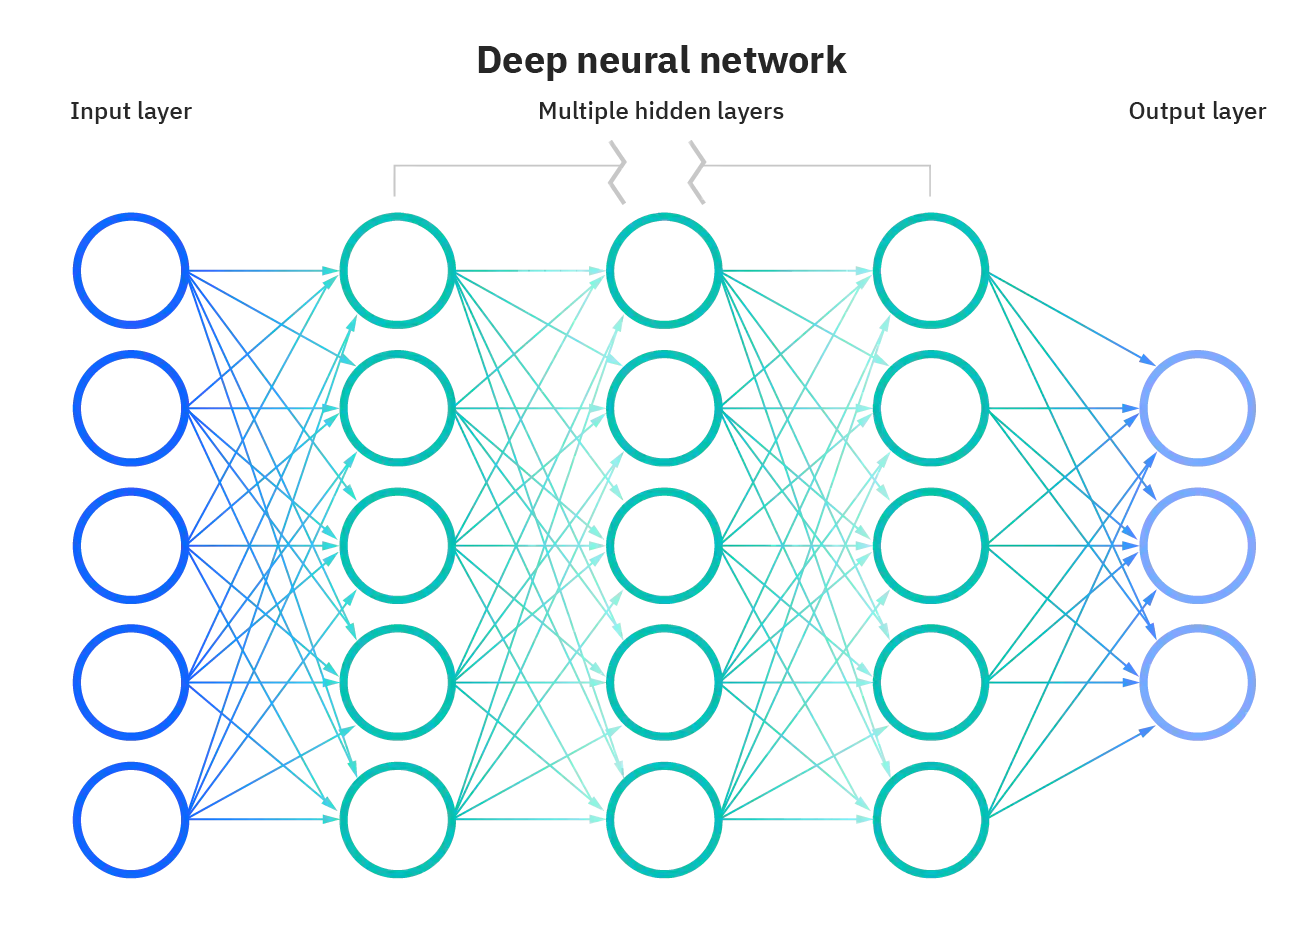

In [46]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[train_df.shape[1]]), #son 11 variables que luego se transforman en 64 q son las neuronas
    #relu es la que mejor funciona, es para tener negativos sean 0 y los positivos queden asi
    layers.Dropout(0.3, seed=2), #para que no se ajusten demasiado mis datos, dropout desactiva algunas neuronas a 0.3
    #que sea max de 0.5 en dropout, es un porcentaje, es una probabilidad
    
    #es 64 x 11 variables solo en la primera capa
    #las fechas son los pesos
    
    layers.Dense(64, activation='swish'), #son las hiden layers, es la sesion de activacion
    #aqui por ejemplo se desactivaran ciertas neuronas para que el modelo si generalice cuando tenga otros datos.
    layers.Dense(64, activation='relu'), #relu, cuando le das tu input y lo va a transformar, 11 y lo va convertir en 1
    layers.Dropout(0.3, seed=2),
    #mientras mas alto el numero, mas probable que desactiven más neuronas
    layers.Dense(64, activation='swish'), #swish parece q es una sigmoide, es mejor poner un tipo de activación para todas
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='swish'),
    
    layers.Dense(1)
])

### Configure the loss function and optimizer before fit your model

In [47]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001) # el LR es la rapidez
#como de rapido ajusto mi modelo a este ejemplo, si lo hago muy rapido mi modelo entrena antes pero he ido al minimo demasiado rapido, es bastante normal el 0.0001

model.compile(
    loss=tf.keras.losses.MeanSquaredError(), #el error cuadrado
    optimizer=optimizer,
    metrics=['mae']
)

#Esto es el error de mi modelo sea menor? quiero que mi error sea el minimo, hace que las neuronas se ajusten

## <font color='*green*'>*Train your model____________*

In [48]:
history = model.fit(
    train_df,
    train_labels,
    epochs=70,
    validation_split=0.2
)

#se podria reducir las pasadas si vemos q luego de cierto numero no varia mucho el error

#loss es la perdida, el MSE si es el error va bajando durante el training quiere decir que es un buen indicador.
#Ha dividido el set en validation y training

Epoch 1/70
156/156 [==============================] - 7s 43ms/step - loss: 222278.4844 - mae: 122.3851 - val_loss: 11927.0156 - val_mae: 65.2889
Epoch 2/70
156/156 [==============================] - 3s 22ms/step - loss: 24901.3457 - mae: 63.4032 - val_loss: 7860.4951 - val_mae: 43.5501
Epoch 3/70
156/156 [==============================] - 2s 10ms/step - loss: 17319.7969 - mae: 53.2401 - val_loss: 10876.6953 - val_mae: 43.3725
Epoch 4/70
156/156 [==============================] - 3s 17ms/step - loss: 41076.1602 - mae: 51.4131 - val_loss: 6916.5586 - val_mae: 29.9706
Epoch 5/70
156/156 [==============================] - 2s 12ms/step - loss: 28466.3359 - mae: 46.8957 - val_loss: 40969.9961 - val_mae: 48.1486
Epoch 6/70
156/156 [==============================] - 2s 14ms/step - loss: 22339.0859 - mae: 42.7290 - val_loss: 23903.0312 - val_mae: 37.9547
Epoch 7/70
156/156 [==============================] - 2s 13ms/step - loss: 27038.8906 - mae: 40.8519 - val_loss: 5686.2983 - val_mae: 26.6496


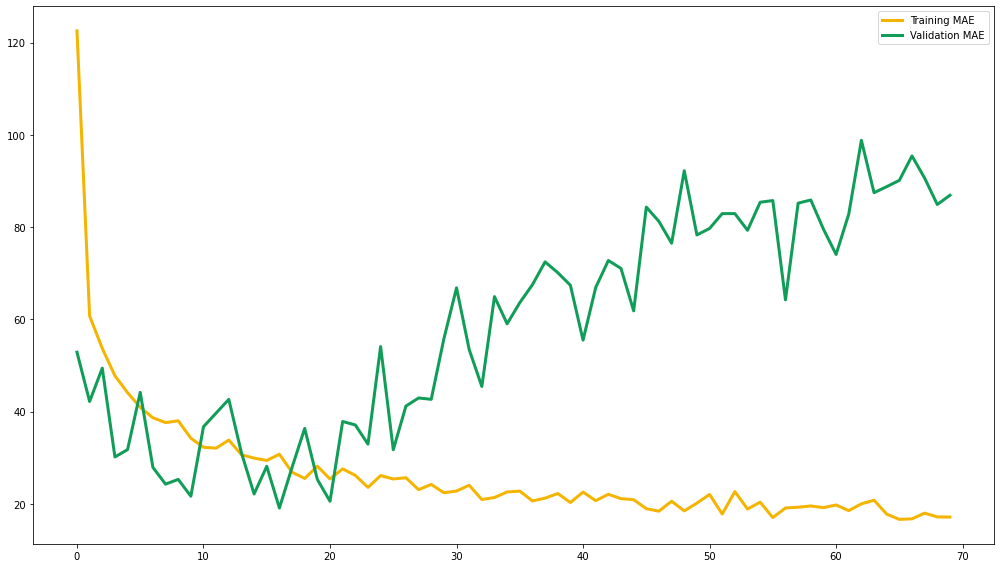

In [46]:
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

_, ax = plt.subplots(figsize=(14,8))
num_epochs = model_history.shape[0]
ax.plot(
    np.arange(0, num_epochs),
    model_history["mae"],
    label="Training MAE",
    lw=3,
    color='#f4b400'
)

ax.plot(
    np.arange(0, num_epochs),
    model_history["val_mae"],
    label="Validation MAE",
    lw=3,
    color='#0f9d58'
)

ax.legend()
plt.tight_layout()
plt.show()

## <font color='*green*'>*Make predictions with your model___________________*

In [38]:
test_unit = test_df.iloc[[13]]
test_unit

NameError: name 'test_df' is not defined

In [48]:
test_pred = model.predict(test_unit).squeeze()
test_lbl = test_labels.iloc[13]

print("Model prediction = {:.2f}".format(test_pred))
print("Actual value = {:.2f}".format(test_lbl))

Model prediction = 153.99
Actual value = 63.00


----------------------

# Evaluate the model

In [50]:
loss, mae = model.evaluate(test_df, test_labels, verbose=0)

In [51]:
print('MAE = {:.2f}'.format(mae))

#mi modelo se equivoca en 50 pacientes cada semana de media

porcentaje=(mae/143*100)
error=100-(mae/143*100)
print(porcentaje)
print(error)

MAE = 82.29
57.547381207659534
42.452618792340466


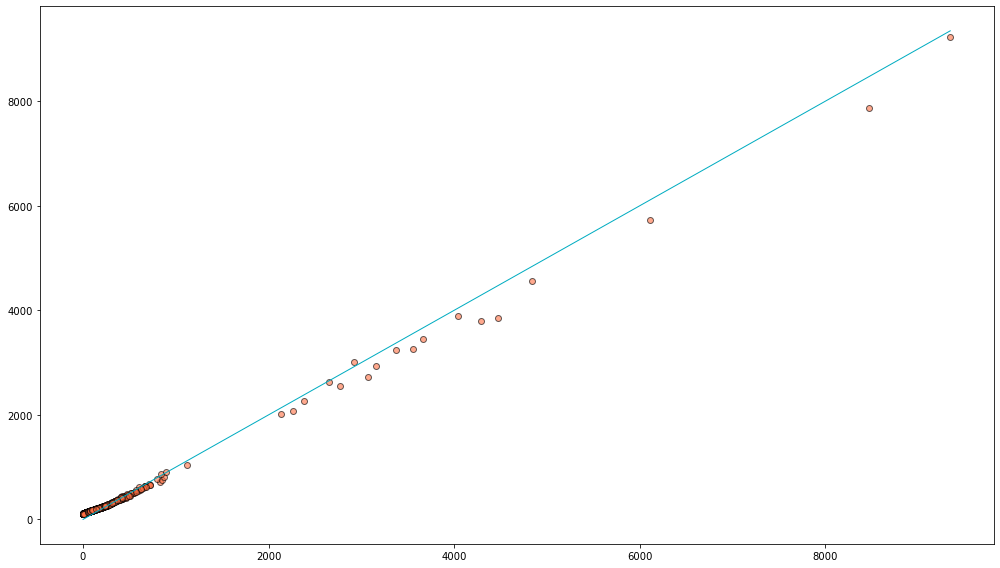

In [52]:
test_predictions_ = model.predict(test_df).flatten()
test_labels_ = test_labels.to_numpy().flatten()

_, ax = plt.subplots(figsize=(14,8))
plt.scatter(
    test_labels_,
    test_predictions_,
    alpha=0.6,
    color='#ff7043',
    lw=1,
    ec='black'
)

lims = [
    0,
    max(test_predictions_.max(), test_labels_.max())
]

plt.plot(lims, lims, lw=1, color='#00acc1')
plt.tight_layout()
plt.show()

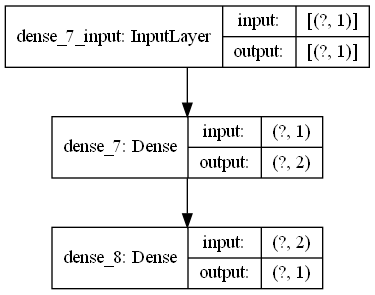

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)